<a href="https://colab.research.google.com/github/nassersaazi/Audio-Keyword-Spotting-Project/blob/master/finalyr_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#download = drive.CreateFile()
from google.colab import files
uploaded = files.upload()

Saving train_LbELtWX.zip to train_LbELtWX.zip


In [0]:
#download.GetContentFile('train_LbELtWX.zip')
!unzip train_LbELtWX.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/45712.png         
 extracting: train/57389.png         
 extracting: train/5260.png          
 extracting: train/58492.png         
 extracting: train/58143.png         
 extracting: train/616.png           
 extracting: train/25467.png         
 extracting: train/37219.png         
 extracting: train/55151.png         
 extracting: train/57860.png         
 extracting: train/22627.png         
 extracting: train/52644.png         
 extracting: train/45879.png         
 extracting: train/33451.png         
 extracting: train/23972.png         
 extracting: train/38967.png         
 extracting: train/38753.png         
 extracting: train/33900.png         
 extracting: train/50011.png         
 extracting: train/1922.png          
 extracting: train/5638.png          
 extracting: train/37358.png         
 extracting: train/6609.png          
 extracting: train/6492.png          
 extracting: train/36174.png         

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
train = pd.read_csv('train.csv')

In [0]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [0]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/782 [00:00<?, ?it/s]


KeyError: ignored

In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
#We will create a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 145s 3ms/step - loss: 0.5033 - acc: 0.8204 - val_loss: 0.3064 - val_acc: 0.8867
Epoch 2/10
48000/48000 [==============================] - 143s 3ms/step - loss: 0.3348 - acc: 0.8788 - val_loss: 0.2580 - val_acc: 0.9052
Epoch 3/10
48000/48000 [==============================] - 144s 3ms/step - loss: 0.2822 - acc: 0.8988 - val_loss: 0.2481 - val_acc: 0.9029
Epoch 4/10
48000/48000 [==============================] - 144s 3ms/step - loss: 0.2490 - acc: 0.9090 - val_loss: 0.2246 - val_acc: 0.9176
Epoch 5/10
48000/48000 [==============================] - 143s 3ms/step - loss: 0.2230 - acc: 0.9174 - val_loss: 0.2159 - val_acc: 0.9222
Epoch 6/10
48000/48000 [==============================] - 144s 3ms/step - loss: 0.2057 - acc: 0.9243 - val_loss: 0.2133 - val_acc: 0.9211
Epoch 7/10
48000/480

In [0]:

from google.colab import files
uploaded = files.upload()

Saving test_ScVgIM0.zip to test_ScVgIM0.zip


In [0]:
#!unzip test_ScVgIM0.zip


In [0]:
test = pd.read_csv('test.csv')
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10000/10000 [00:03<00:00, 2892.81it/s]


In [0]:
# making predictions
prediction = model.predict_classes(test)

In [0]:
import pandas as pd
import numpy as np

In [0]:
#dset = pd.read_csv('C:/Users/nasser/finalyear/model/train.csv')
from google.colab import files
uploaded = files.upload()

Saving sample.zip to sample.zip


# New Section

In [0]:
!unzip sample.zip

Archive:  sample.zip
  inflating: sample/train.csv        
   creating: sample/train_cbb_healthy/
  inflating: sample/train_cbb_healthy/train-cbb-0.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-1.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-10.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-100.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-101.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-102.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-103.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-104.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-105.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-106.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-107.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-108.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-109.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-11.jpg  
  inflating: sample/train_cbb_healthy/train-cbb-110.jpg  
  inflating: sample/train_cbb_healthy/

In [0]:
train = pd.read_csv('sample/train.csv')
#ls

In [0]:
train.head()

,name,label
0,train-cbb-0.jpg,1
1,train-cbb-1.jpg,1
2,train-cbb-10.jpg,1
3,train-cbb-100.jpg,1
4,train-cbb-101.jpg,1


In [0]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample/train_cbb_healthy/'+train['name'][i], target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 782/782 [00:07<00:00, 103.91it/s]


In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
#We will create a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 625 samples, validate on 157 samples
Epoch 1/5
625/625 [==============================] - 620s 993ms/step - loss: 4.4931 - acc: 0.4064 - val_loss: 2.5081 - val_acc: 0.3949
Epoch 2/5
625/625 [==============================] - 616s 985ms/step - loss: 2.0263 - acc: 0.4096 - val_loss: 1.7353 - val_acc: 0.3949
Epoch 3/5
625/625 [==============================] - 614s 982ms/step - loss: 1.6728 - acc: 0.4048 - val_loss: 1.5705 - val_acc: 0.3949
Epoch 4/5
625/625 [==============================] - 616s 986ms/step - loss: 1.4609 - acc: 0.4096 - val_loss: 1.3420 - val_acc: 0.3949
Epoch 5/5
512/625 [=======================>......] - ETA: 1:43 - loss: 1.2674 - acc: 0.3828

In [0]:
model.save("model_v2_0_6051.h5")

In [0]:
ls

model_v1_0_6051.h5  model_v2_0_6051.h5  sample/  sample_data/  sample.zip


In [0]:
from google.colab import files
files.download('model_v2_0_6051.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 50606, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
!pip install scipy==1.1.0

  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [1]:

import sys
import numpy as np
import pandas as pd
#from scipy.misc.imageio import imread
import imageio
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

Using TensorFlow backend.


In [0]:

train_folder = "images_background"
val_folder = "images_evaluation"
save_path = "/content/"

In [3]:
from google.colab import files
uploaded = files.upload()

Saving omniglot-master.zip to omniglot-master.zip


In [0]:
#!unzip omniglot-master/python/images_evaluation.zip


In [0]:
def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            # read all the images in the current category
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = imageio.imread(image_path)
                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

In [8]:
import os

X,y,c=loadimgs(train_folder)

loading alphabet: Mkhedruli_(Georgian)
loading alphabet: N_Ko
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Latin
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
loading alphabet: Hebrew
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Korean
loading alphabet: Sanskrit
loading alphabet: Grantha
loading alphabet: Bengali
loading alphabet: Tifinagh
loading alphabet: Japanese_(hiragana)
loading alphabet: Balinese
loading alphabet: Arcadian
loading alphabet: Gujarati
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Japanese_(katakana)
loading alphabet: Braille
loading alphabet: Greek
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Futurama
loading alphabet: Armenian
loading alphabet: Early_Aramaic
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Cyrillic
loading alphabet: Alphabet_of_the_Magi
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Burmese_(Myanmar)
loading alphabet: Tagalog


In [0]:
with open(os.path.join(save_path,"train.pickle"), "wb") as f:
    pickle.dump((X,c),f)

In [10]:

Xval,yval,cval=loadimgs(val_folder)

loading alphabet: Manipuri
loading alphabet: Aurek-Besh
loading alphabet: Gurmukhi
loading alphabet: Keble
loading alphabet: Tibetan
loading alphabet: Atemayar_Qelisayer
loading alphabet: Angelic
loading alphabet: Sylheti
loading alphabet: Oriya
loading alphabet: Old_Church_Slavonic_(Cyrillic)
loading alphabet: ULOG
loading alphabet: Syriac_(Serto)
loading alphabet: Mongolian
loading alphabet: Avesta
loading alphabet: Tengwar
loading alphabet: Glagolitic
loading alphabet: Kannada
loading alphabet: Atlantean
loading alphabet: Malayalam
loading alphabet: Ge_ez


In [0]:
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
    pickle.dump((Xval,cval),f)

In [0]:

def initialize_weights(shape,name=None,dtype=np.dtype('float32')):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [0]:
def initialize_bias(shape, name=None,dtype=np.dtype('float32')):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [0]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [15]:
model = get_siamese_model((105, 105, 1))
model.summary()





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]     

In [16]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
with open(os.path.join(save_path, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(train_classes.keys()))

Training alphabets: 

['Mkhedruli_(Georgian)', 'N_Ko', 'Asomtavruli_(Georgian)', 'Latin', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Korean', 'Sanskrit', 'Grantha', 'Bengali', 'Tifinagh', 'Japanese_(hiragana)', 'Balinese', 'Arcadian', 'Gujarati', 'Anglo-Saxon_Futhorc', 'Japanese_(katakana)', 'Braille', 'Greek', 'Syriac_(Estrangelo)', 'Futurama', 'Armenian', 'Early_Aramaic', 'Malay_(Jawi_-_Arabic)', 'Cyrillic', 'Alphabet_of_the_Magi', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Burmese_(Myanmar)', 'Tagalog']


In [18]:
with open(os.path.join(save_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Validation alphabets:

['Manipuri', 'Aurek-Besh', 'Gurmukhi', 'Keble', 'Tibetan', 'Atemayar_Qelisayer', 'Angelic', 'Sylheti', 'Oriya', 'Old_Church_Slavonic_(Cyrillic)', 'ULOG', 'Syriac_(Serto)', 'Mongolian', 'Avesta', 'Tengwar', 'Glagolitic', 'Kannada', 'Atlantean', 'Malayalam', 'Ge_ez']


In [0]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
    
    return pairs, targets

In [0]:

def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [0]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,),replace=False)

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,),replace=False)            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [0]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [0]:
# Hyper parameters
evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 20000 # No. of training iterations
N_way = 20 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

In [0]:
model_path = './weights/'

In [27]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

Starting training process!
-------------------------------------









 ------------- 

Time for 200 iterations: 0.8655129591623942 mins
Train Loss: 2.394589424133301
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 25.2% 20 way one-shot learning accuracy 

Current best: 25.2, previous best: -1

 ------------- 

Time for 400 iterations: 1.6534014105796815 mins
Train Loss: 1.491603136062622
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 36.8% 20 way one-shot learning accuracy 

Current best: 36.8, previous best: 25.2

 ------------- 

Time for 600 iterations: 2.439695187409719 mins
Train Loss: 1.3170512914657593
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 45.2% 20 way one-shot learning accuracy 

Current best: 45.2, previous best: 36.8

 ------------- 

Time for 800 iterations: 3.2189769943555198 mins
Train Loss: 1.225690484046936
Evaluating model on 250 random 20 way

In [0]:
model.load_weights(os.path.join(model_path, "weights.20000.h5"))

In [0]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

In [0]:
def test_nn_accuracy(N_ways,n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials

In [0]:
ways = np.arange(1,20,2)
resume =  False
trials = 50

In [32]:
val_accs, train_accs,nn_accs = [], [], []
for N in ways:    
    val_accs.append(test_oneshot(model, N, trials, "val", verbose=True))
    train_accs.append(test_oneshot(model, N, trials, "train", verbose=True))
    nn_acc = test_nn_accuracy(N, trials)
    nn_accs.append(nn_acc)
    print ("NN Accuracy = ", nn_acc)
    print("---------------------------------------------------------------------------------------------------------------")

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 100.0% 1 way one-shot learning accuracy 

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 100.0% 1 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 1 way one-shot learning tasks ...
NN Accuracy =  100.0
---------------------------------------------------------------------------------------------------------------
Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 96.0% 3 way one-shot learning accuracy 

Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 100.0% 3 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 3 way one-shot learning tasks ...
NN Accuracy =  42.0
---------------------------------------------------------------------------------------------------------------
Evaluating model on 50 random 5 way one-shot learning tasks ... 

Got an average

In [0]:
# Save the accuracies on disk
with open(os.path.join(save_path,"accuracies.pickle"), "wb") as f:
    pickle.dump((val_accs,train_accs,nn_accs),f)

In [0]:
#Load the accuracies from disk
with open(os.path.join(save_path, "accuracies.pickle"), "rb") as f:
    (val_accs, train_accs, nn_accs) = pickle.load(f)

In [0]:
# Below two functions are used for visualizing test image and support set
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [0]:

def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

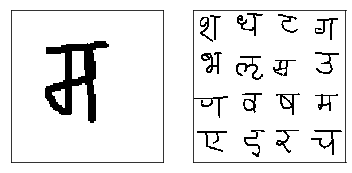

In [37]:
# Example of concat image visualization
pairs, targets = make_oneshot_task(16,"train","Sanskrit")
plot_oneshot_task(pairs)

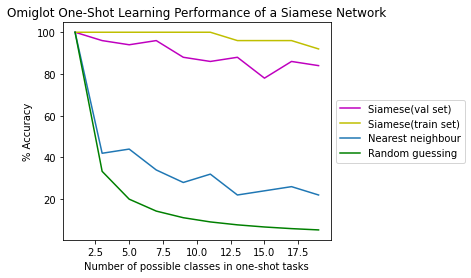

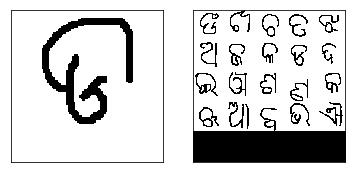

In [38]:
# Results
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = make_oneshot_task(20, "val", 'Oriya')
plt.show()

plot_oneshot_task(inputs)